# Day 15: Logistic Regression

Unlike Linear Regression (which predicts continuous values),  
**Logistic Regression** is used for **classification problems** (e.g., Pass/Fail, Yes/No, Spam/Not Spam).

---

## Logistic Function (Sigmoid):
It maps values between **0 and 1**.  

σ(z) = 1 / (1 + e^(-z))  

- If probability ≥ 0.5 → Class 1 (e.g., Pass)  
- If probability < 0.5 → Class 0 (e.g., Fail)  

---

## Example: Predict Pass/Fail based on Study Hours


In [1]:
# Day 15: Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example dataset
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Result":        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
df


,Hours_Studied,Result
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [2]:
# Features and target
X = df[["Hours_Studied"]]
y = df["Result"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of passing


In [3]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



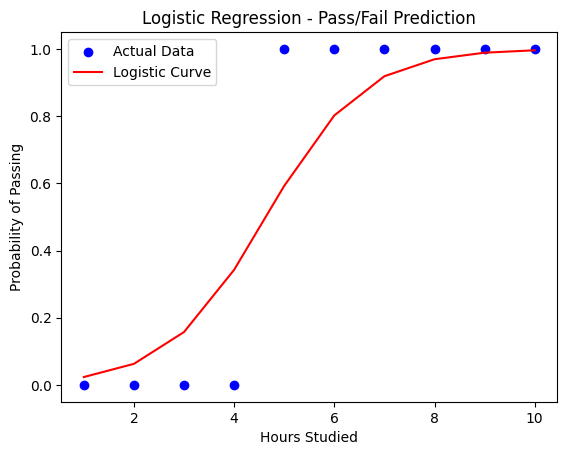

In [4]:
# Visualization
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict_proba(X)[:,1], color="red", label="Logistic Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Pass/Fail Prediction")
plt.legend()
plt.show()


In [5]:
# Predict if a student will pass with 4.5 hours of study
new_hours = pd.DataFrame({"Hours_Studied": [4.5]})
prediction = model.predict(new_hours)[0]
probability = model.predict_proba(new_hours)[0][1]

print(f"Predicted Result: {'Pass' if prediction==1 else 'Fail'}")
print(f"Probability of Passing: {probability:.2f}")


Predicted Result: Fail
Probability of Passing: 0.47


### ✅ Key Points:
- Logistic Regression is for **binary classification**.  
- Output is probability (0–1), converted into class labels.  
- Evaluation uses **accuracy, confusion matrix, precision, recall, F1-score**.  
